In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Carga los datos
base_path = os.path.join('..', 'data', 'geoai-ground-level-no2-estimation-challenge20240710-12938-q3sk51')
train_path = os.path.join(base_path, 'Train.csv')
train_df = pd.read_csv(train_path)

# Intenta convertir la columna 'Date' a datetime
try:
    train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d/%m/%Y')  # Ajusta el formato según lo esperado
    print("Conversión exitosa. Todas las fechas están en el formato esperado.")
except ValueError as e:
    print("Error en la conversión:", e)
    # Explora los primeros valores para detectar formatos inesperados
    print("Algunos formatos de fecha pueden ser diferentes. Muestra de fechas:")
    print(train_df['Date'].head())

# Si necesitas una comprobación más profunda de los formatos, puedes usar:
if 'Error' in locals():
    # Extrae ejemplos de fechas que no cumplen con el formato esperado
    format_errors = train_df['Date'].apply(lambda x: x.count('/') == 2 and len(x) == 10)
    print("Fechas con posibles errores de formato:")
    print(train_df.loc[~format_errors, 'Date'].unique())


Error en la conversión: time data "1/1/19" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Algunos formatos de fecha pueden ser diferentes. Muestra de fechas:
0    1/1/19
1    1/1/19
2    1/1/19
3    1/1/19
4    1/1/19
Name: Date, dtype: object


In [4]:
import pandas as pd

# Carga los datos
base_path = os.path.join('..', 'data', 'geoai-ground-level-no2-estimation-challenge20240710-12938-q3sk51')
train_path = os.path.join(base_path, 'Train.csv')
train_df = pd.read_csv(train_path)

# Corrige el formato de la fecha a `%d/%m/%y` que se ajusta a '1/1/19'
try:
    train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d/%m/%y')  # Ajuste para año en dos dígitos
    print("Conversión exitosa. Todas las fechas están en el formato correcto.")
except ValueError as e:
    print("Error en la conversión:", e)
    # Si aún hay errores, explora más profundamente
    print("Revisión de formatos de fecha:")
    print(train_df['Date'].head(10))

Error en la conversión: time data "13-01-19" doesn't match format "%d/%m/%y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Revisión de formatos de fecha:
0    1/1/19
1    1/1/19
2    1/1/19
3    1/1/19
4    1/1/19
5    1/1/19
6    1/1/19
7    1/1/19
8    1/1/19
9    1/1/19
Name: Date, dtype: object


In [6]:
import pandas as pd

# Carga los datos
base_path = os.path.join('..', 'data', 'geoai-ground-level-no2-estimation-challenge20240710-12938-q3sk51')
train_path = os.path.join(base_path, 'Train.csv')
train_df = pd.read_csv(train_path)

# Intenta convertir la columna 'Date' a datetime sin especificar un formato
train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')

# Verifica si hay fechas no convertidas (NaT)
if train_df['Date'].isnull().any():
    print("Algunas fechas no pudieron ser convertidas y fueron establecidas a NaT.")
    print(train_df[train_df['Date'].isnull()])
else:
    print("Todas las fechas fueron convertidas exitosamente.")

# Inspecciona las primeras filas para verificar la conversión
print(train_df['Date'].head())


Todas las fechas fueron convertidas exitosamente.
0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: Date, dtype: datetime64[ns]


/var/folders/xs/759nsb412kq1j2kcfl4f0p_80000gn/T/ipykernel_7168/510054129.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')


In [7]:
# Extraer años, meses y días de la columna 'Date'
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Day'] = train_df['Date'].dt.day

# Contar valores únicos
unique_years = train_df['Year'].nunique()
unique_months = train_df['Month'].nunique()
unique_days = train_df['Day'].nunique()

print(f"Cantidad de años únicos: {unique_years}")
print(f"Cantidad de meses únicos: {unique_months}")
print(f"Cantidad de días únicos: {unique_days}")


Cantidad de años únicos: 3
Cantidad de meses únicos: 12
Cantidad de días únicos: 31


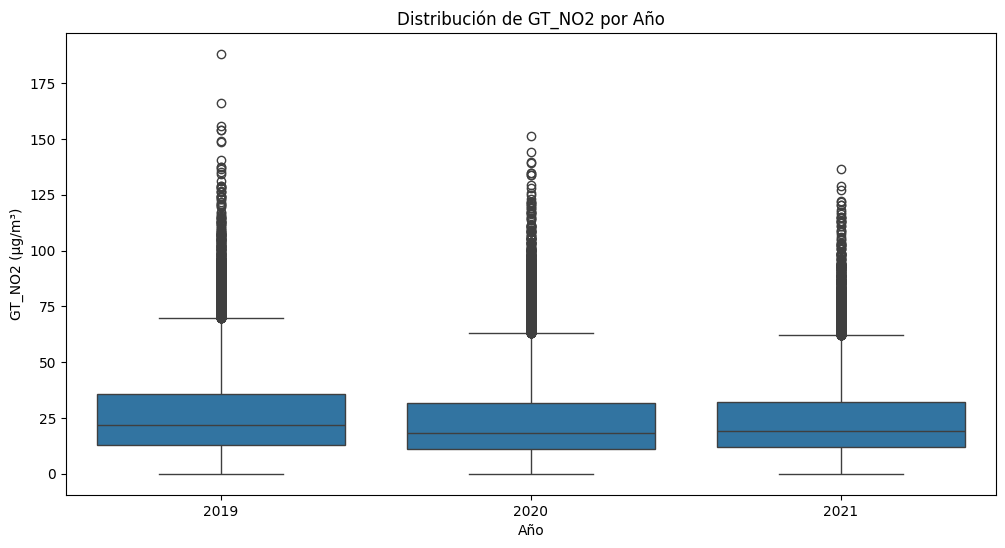

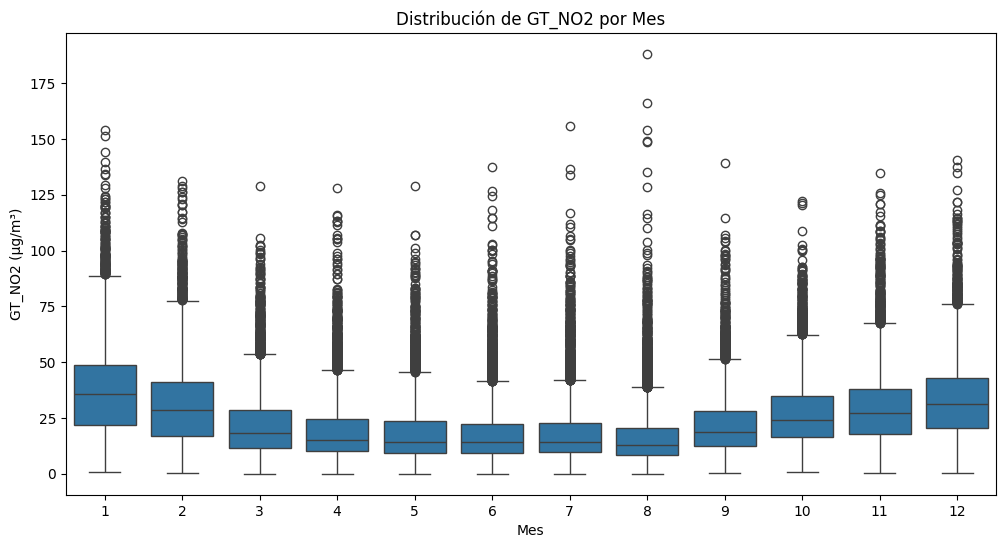

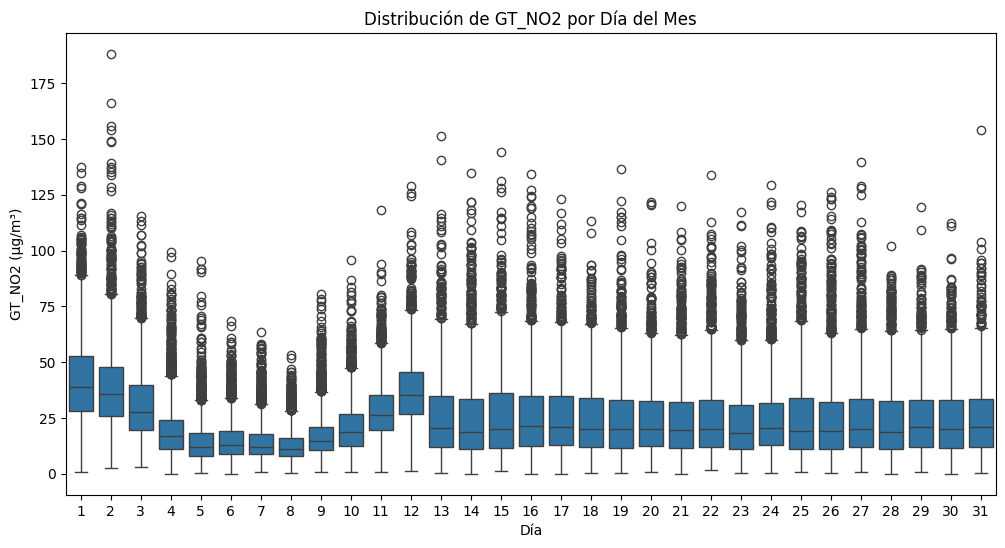

In [8]:
# Visualización de GT_NO2 a lo largo del tiempo

# Distribución por Año
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='GT_NO2', data=train_df)
plt.title('Distribución de GT_NO2 por Año')
plt.xlabel('Año')
plt.ylabel('GT_NO2 (µg/m³)')
plt.show()

# Distribución por Mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='GT_NO2', data=train_df)
plt.title('Distribución de GT_NO2 por Mes')
plt.xlabel('Mes')
plt.ylabel('GT_NO2 (µg/m³)')
plt.show()

# Distribución por Día
plt.figure(figsize=(12, 6))
sns.boxplot(x='Day', y='GT_NO2', data=train_df)
plt.title('Distribución de GT_NO2 por Día del Mes')
plt.xlabel('Día')
plt.ylabel('GT_NO2 (µg/m³)')
plt.show()
